## Exploratory Data Analysis(EDA) of Credit Card Data

In [4]:
import pandas as pd 
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns


 
df = pd.read_csv(r'C:\Users\Yashwanth\Downloads\credit_card.csv')
df1 = pd.read_csv(r'C:\Users\Yashwanth\Downloads\customer.csv')

In [5]:
df.head()
df1.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


In [10]:
#Calculate the total revenue by summing the annual fees, total transaction amount, and interest earned columns

df['Revenue'] = df['Annual_Fees'] + df['Total_Trans_Amt'] + df['Interest_Earned']
df.head()
df['Revenue'] = df['Revenue'].round().astype(int)



In [333]:
#Total Revenue
Total_Revenue = df['Revenue'].sum().astype(int)
Total_Revenue = Total_Revenue/1000000
Total_Revenue = "{:.1f}".format(Total_Revenue)
print(Total_Revenue +'M')

55.3M


In [343]:
#Total_Income
Total_Income = df3['Income'].sum().astype(int)
Total_Income = Total_Income/1000000
Total_Income = "{:.1f}".format(Total_Income)
print(Total_Income +'M')

575.9M


In [349]:
#Total_Interest
Total_Interest = df['Interest_Earned'].sum().astype(int)
Total_Interest = Total_Interest/1000000
Total_Income = "{:.1f}".format(Total_Interest)
print(Total_Income+'M')

7.8M


In [204]:
#used groupby fuction to get Total_Revenue and Total_Trans_Vol for Qtr wise
Quarterly_Total = df.groupby('Qtr').agg({'Revenue': 'sum', 'Total_Trans_Vol': 'sum'}).reset_index()
Quarterly_Total['Revenue'] = Quarterly_Total['Revenue'].astype(int)
Quarterly_Total

,Qtr,Revenue,Total_Trans_Vol
0,Q1,13964362,163255
1,Q2,13820566,164201
2,Q3,14235479,166566
3,Q4,13295001,161629


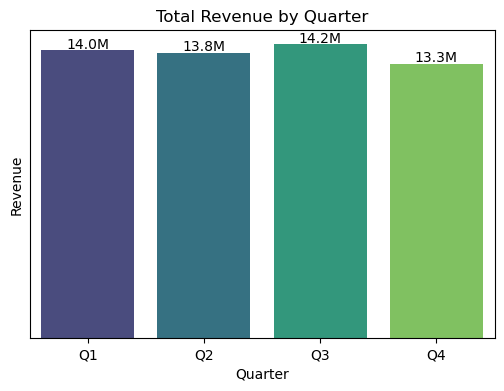

In [208]:
#Created Visual Bar chart for Total_Revenue by Quarter
plt.figure(figsize=(6, 4))
sns.barplot(x='Qtr', y='Revenue', data=Quarterly_Total, palette='viridis')
# Add total revenue in millions on top of each bar
for index, value in enumerate(Quarterly_Total['Revenue']):
    plt.text(index, value + 100000, f'{value/1000000:.1f}M', ha='center')

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Total Revenue by Quarter')
plt.yticks([])  # Remove y-axis ticks
plt.show()

 

In [186]:
#Used groupby Fuction to group rows together based on the values in a particular column 
total_card_category = df.groupby('Card_Category').agg({'Revenue':'sum', 'Interest_Earned':'sum', 'Annual_Fees':'sum'}).reset_index()


In [350]:

total_card_category['Revenue'] = total_card_category['Revenue'].astype(int)
total_card_category['Interest_Earned'] = total_card_category['Interest_Earned'].astype(int)
total_card_category = total_card_category.sort_values('Revenue', ascending=False)
total_card_category

,Card_Category,Revenue,Interest_Earned,Annual_Fees
0,Blue,46139397,6495887,2685635
3,Silver,5586332,812081,187505
1,Gold,2454072,373784,56210
2,Platinum,1135608,161629,20665


In [106]:
#highest Revenue Generated card_category
 

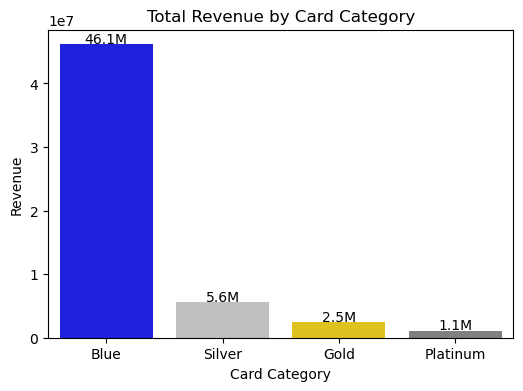

In [189]:
#Hightest Revenue Generated by Card_Category
colors = {'Blue': 'blue', 'Silver': 'silver', 'Gold': 'gold', 'Platinum': 'gray'}
color_map = [colors[card] for card in total_card_category['Card_Category']]

# Create the Seaborn bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Card_Category', y='Revenue', data=total_card_category, palette=color_map)

for index, value in enumerate(total_card_category['Revenue']):
    plt.text(index, value + 100000, f'{value/1000000:.1f}M', ha='center')

# Add labels and title
plt.xlabel('Card Category')
plt.ylabel('Revenue')
plt.title('Total Revenue by Card Category')
plt.show()

In [191]:
#Total_Revenue by Expenditure_Type
Exp_Type = df.groupby('Exp Type').agg({'Revenue':'sum'}).reset_index()
Exp_Type['Revenue'] = Exp_Type['Revenue'].astype(int)
Exp_Type

,Exp Type,Revenue
0,Bills,13775095
1,Entertainment,9521159
2,Food,8250448
3,Fuel,9327144
4,Grocery,8575812
5,Travel,5865749


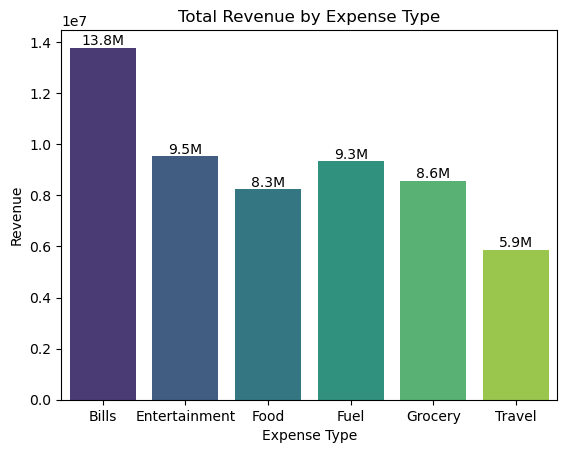

In [192]:
# Created Visualization for Total_Expenditure_Type by Revenue
import seaborn as sns
sns.barplot(x='Exp Type', y='Revenue', data=Exp_Type, palette='viridis')
for index, value in enumerate(Exp_Type['Revenue']):
    plt.text(index, value + 100000, f'{value/1000000:.1f}M', ha='center')
    

# Add labels and title
plt.xlabel('Expense Type')
plt.ylabel('Revenue')
plt.title('Total Revenue by Expense Type')
plt.show()

In [193]:
use_chip = df.groupby('Use Chip').agg({'Revenue':'sum'}).reset_index()
use_chip['Revenue'] = use_chip['Revenue'].astype(int)
use_chip = use_chip.sort_values('Revenue', ascending=False)
use_chip

,Use Chip,Revenue
2,Swipe,34912797
0,Chip,16966823
1,Online,3435789


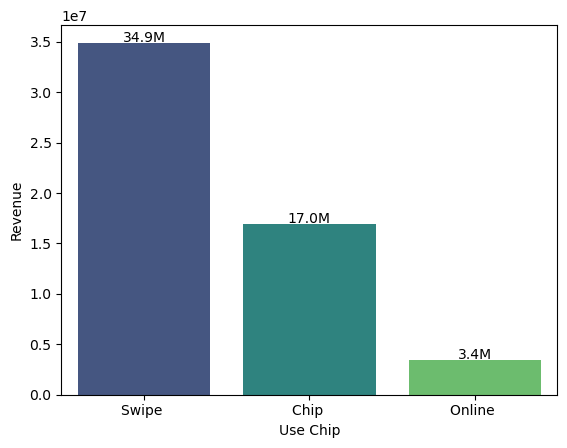

In [194]:
#Created Visualization, that shows Total Revenue Genarated for Chip
sns.barplot(x='Use Chip', y='Revenue', data=use_chip, palette='viridis')
for index, value in enumerate(use_chip['Revenue']):
    plt.text(index, value + 100000, f'{value/1000000:.1f}M', ha='center')

In [195]:
df
customer_acq_cost = df.groupby('Card_Category').agg({'Customer_Acq_Cost':'sum'}).reset_index()
customer_acq_cost = customer_acq_cost.sort_values('Customer_Acq_Cost',ascending = False)
customer_acq_cost

,Card_Category,Customer_Acq_Cost
0,Blue,887973
3,Silver,60851
1,Gold,17542
2,Platinum,6570


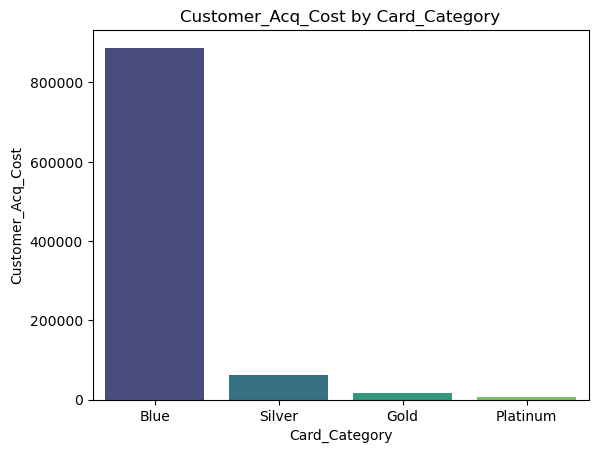

In [196]:
sns.barplot(x='Card_Category', y='Customer_Acq_Cost', data=customer_acq_cost, palette='viridis' )
plt.title('Customer_Acq_Cost by Card_Category')
plt.show()


In [64]:
df1.head()
df3 =df.merge(df1, how='inner', on='Client_Num')
#df1.tail()

In [269]:
State = df3.groupby('state_cd').agg({'Revenue':'sum'}).reset_index()
State  = State.sort_values('Revenue', ascending=False).head(5)
State

,state_cd,Revenue
24,TX,12809300.67
19,NY,12733454.75
3,CA,12615274.39
6,FL,9690947.18
16,NJ,4245441.70


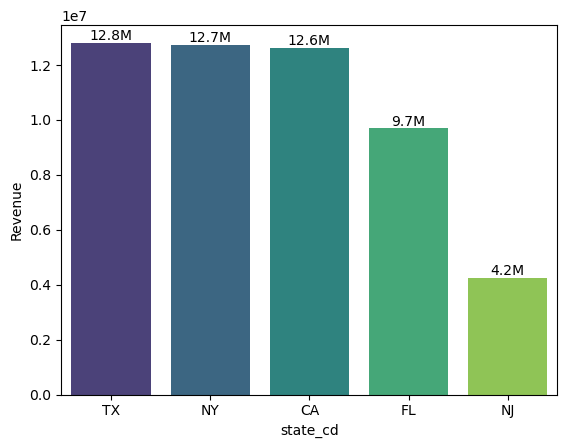

In [271]:
sns.barplot(x='state_cd', y='Revenue', data= State, palette='viridis')
for index, value in enumerate(State['Revenue']):
    plt.text(index, value + 100000, f'{value/1000000:.1f}M', ha='center')

In [329]:
customer = df3.groupby('Customer_Job').agg({'Revenue': 'sum', 'Interest_Earned':'sum','Income':'sum'}).reset_index().sort_values('Revenue', ascending=False)
customer['Revenue'] = customer['Revenue'].astype(int) 
customer


,Customer_Job,Revenue,Interest_Earned,Income
1,Businessman,17387832,2539390.31,186959919
5,White-collar,10114655,1441073.93,103930055
4,Selfemployeed,8261757,1119741.81,75313288
2,Govt,8111701,1160016.37,88773989
0,Blue-collar,6904278,952800.57,72262158
3,Retirees,4535184,630359.24,48675030


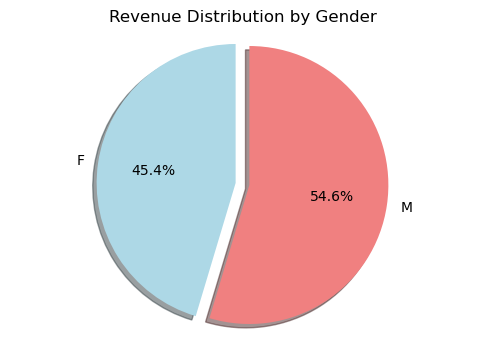

In [44]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = gender_df['Gender']
sizes = gender_df['Revenue']
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Female)

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Revenue Distribution by Gender')

# Display the chart
plt.show()


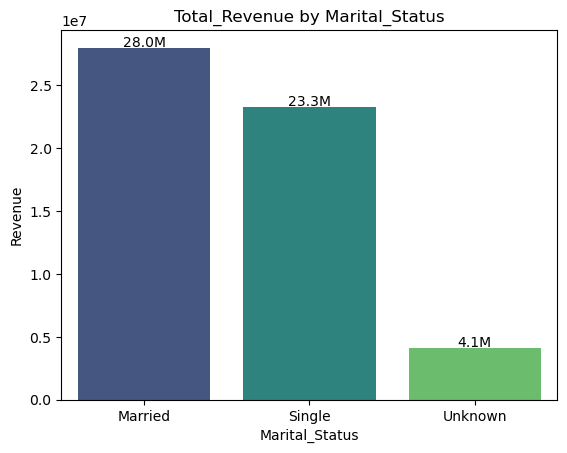

In [93]:
import seaborn as sns
marital_status = df3.groupby('Marital_Status').agg({'Revenue':'sum'}).reset_index()
marital_status['Revenue'] = marital_status['Revenue'].astype(int)
sns.barplot(x='Marital_Status', y='Revenue', data=marital_status, palette='viridis')
plt.title('Total_Revenue by Marital_Status')
for index, value in enumerate(marital_status['Revenue']):
    plt.text(index, value + 100000, f'{value/1000000:.1f}M', ha='center')
    
 
 

In [ ]:
edu_level = df3.groupby('Education_Level').agg({'Revenue':'sum'}).reset_index()
sns.barplot(x='Revenue', y='Education_Level', data=edu_level, palette='viridis')
for index, value in enumerate(edu_level['Revenue']):
    plt.text(index, value + 100000, f'{value/1000000:.1f}M', ha='center',orient='h')
plt.title(' Revenue by Educational_Level')
plt.show()

In [72]:
bins = [0,30,55,100]
labels = ['Young', 'Middle', 'Old']
df3['Age_Group'] = pd.cut(df3['Customer_Age'], bins=bins, labels=labels, right=False)


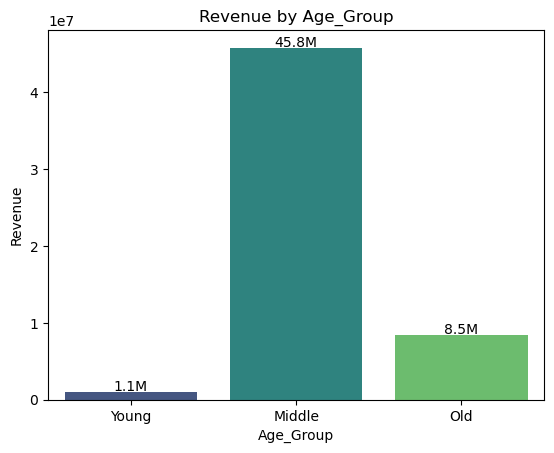

In [77]:
age_group = df3.groupby('Age_Group').agg({'Revenue':'sum'}).reset_index()
sns.barplot(x='Age_Group', y='Revenue', data=age_group, palette='viridis')
for index, value in enumerate(age_group['Revenue']):
    plt.text(index, value + 100000, f'{value/1000000:.1f}M', ha='center')
plt.title('Revenue by Age_Group')
plt.show()
